# Supervised Learning - Project

In this Project, we are going to perform a full unsupervised learning machine learning project on a "Wholesale Data" dataset. The dataset refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories

[Kaggle Link](https://www.kaggle.com/datasets/binovi/wholesale-customers-data-set)

# Part I : EDA - Exploratory Data Analysis & Pre-processing

The given dataset seems to be a grocery sales dataset containing information about various products sold by a grocery store. To perform an exploratory data analysis (EDA) on this dataset, we can perform the following tasks:

- Data Import: Import the dataset into a statistical software tool such as Python or R.
- Data Cleaning: Check the dataset for any missing or incorrect data and clean the dataset accordingly. This may involve removing or imputing missing data or correcting any obvious errors.
Data Description: Generate summary statistics such as mean, median, and standard deviation for each column of the dataset. This will help in understanding the distribution of data in each column.
- Data Visualization: Create various visualizations such as histograms, box plots, scatter plots, and heatmaps to understand the relationships and trends between the different variables in the dataset. For example, we can create a scatter plot between the "Fresh" and "Milk" variables to see if there is any correlation between them.
- Outlier Detection: Check for any outliers in the dataset and determine whether they are valid or erroneous data points.
- Correlation Analysis: Calculate the correlation between different variables in the dataset to determine which variables are highly correlated and which ones are not. For example, we can calculate the correlation between "Grocery" and "Detergents_Paper" to see if there is any relationship between these two variables.
- Data Transformation: If necessary, transform the data by standardizing or normalizing the variables to make them comparable across different scales.
- Feature Selection: Identify the most important features or variables that contribute the most to the overall variance in the dataset. This can be done using various feature selection techniques such as principal component analysis (PCA) or random forest regression.

In [1]:
import pandas as pd
import numpy as np



data = pd.read_csv('wholesale_data.csv')

In [2]:
data.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [4]:
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


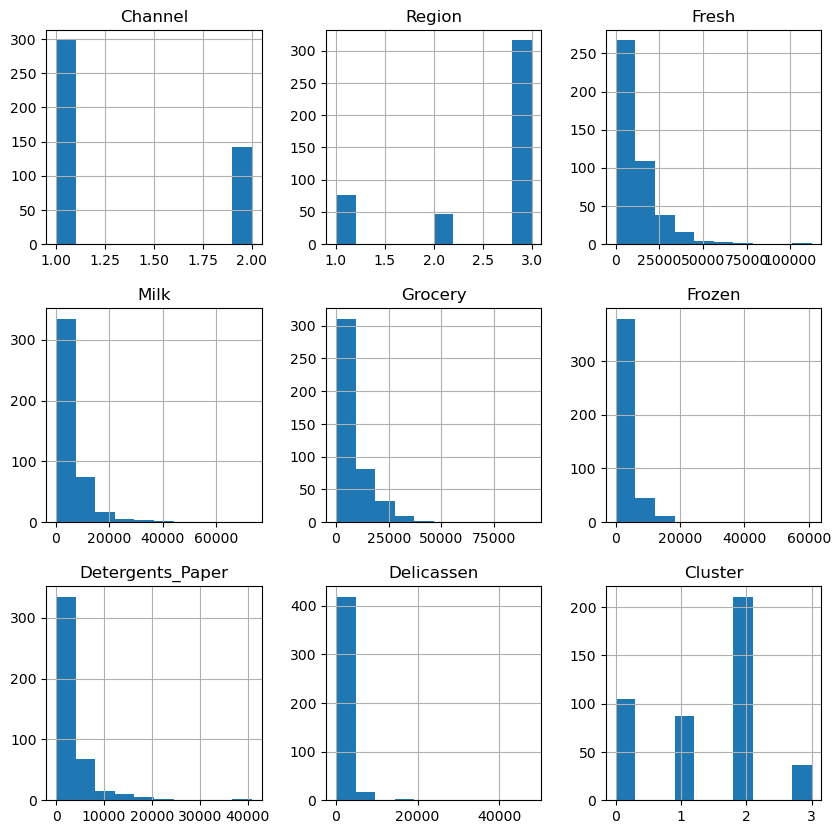

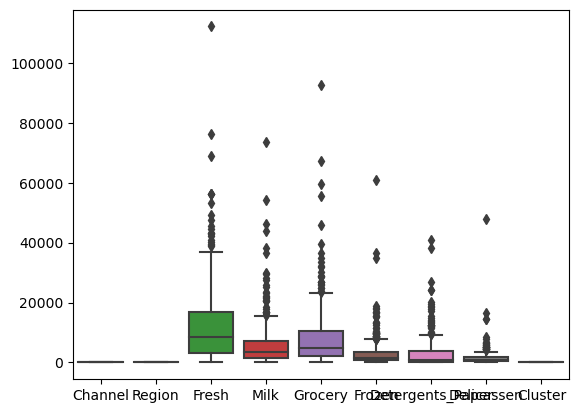

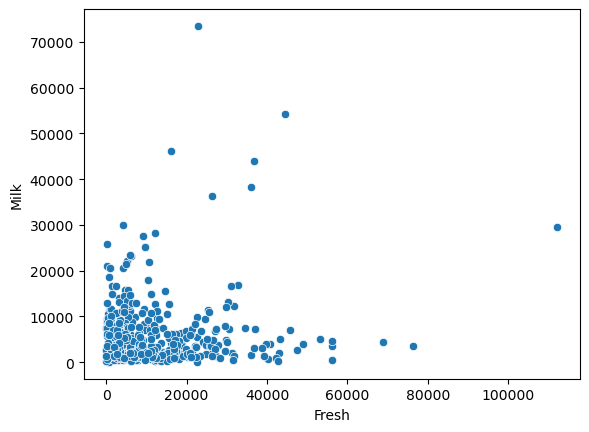

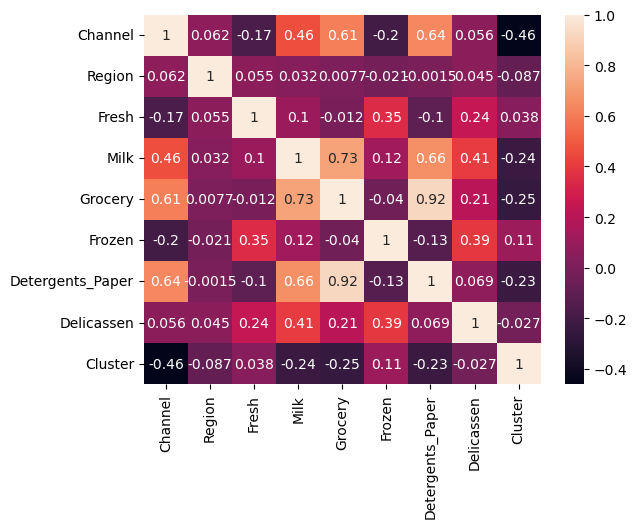

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns


# Histogram
data.hist(figsize=(10, 10))
plt.show()

# Box plot
sns.boxplot(data=data)
plt.show()

# Scatter plot
sns.scatterplot(x='Fresh', y='Milk', data=data)
plt.show()

# Heatmap
sns.heatmap(data.corr(), annot=True)
plt.show()

In [14]:
# Outlier Detection

Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)
outliers.sum()

108

In [8]:
correlation = data.corr()
print(correlation)

                   Channel    Region     Fresh      Milk   Grocery    Frozen  \
Channel           1.000000  0.062028 -0.169172  0.460720  0.608792 -0.202046   
Region            0.062028  1.000000  0.055287  0.032288  0.007696 -0.021044   
Fresh            -0.169172  0.055287  1.000000  0.100510 -0.011854  0.345881   
Milk              0.460720  0.032288  0.100510  1.000000  0.728335  0.123994   
Grocery           0.608792  0.007696 -0.011854  0.728335  1.000000 -0.040193   
Frozen           -0.202046 -0.021044  0.345881  0.123994 -0.040193  1.000000   
Detergents_Paper  0.636026 -0.001483 -0.101953  0.661816  0.924641 -0.131525   
Delicassen        0.056011  0.045212  0.244690  0.406368  0.205497  0.390947   

                  Detergents_Paper  Delicassen  
Channel                   0.636026    0.056011  
Region                   -0.001483    0.045212  
Fresh                    -0.101953    0.244690  
Milk                      0.661816    0.406368  
Grocery                   0.924641

In [15]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [16]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = MinMaxScaler()
data_normalized = scaler.fit_transform(data)

In [19]:
data_normalized

array([[1.00000000e+00, 1.00000000e+00, 1.12940044e-01, ...,
        3.10630465e-03, 6.54271997e-02, 2.78473091e-02],
       [1.00000000e+00, 1.00000000e+00, 6.28990263e-02, ...,
        2.85484189e-02, 8.05898491e-02, 3.69837297e-02],
       [1.00000000e+00, 1.00000000e+00, 5.66216072e-02, ...,
        3.91164289e-02, 8.60523222e-02, 1.63558615e-01],
       ...,
       [1.00000000e+00, 1.00000000e+00, 1.29543104e-01, ...,
        6.77141542e-03, 3.63462669e-01, 3.88819358e-02],
       [0.00000000e+00, 1.00000000e+00, 9.17270036e-02, ...,
        1.66491355e-02, 4.04174015e-03, 4.42636629e-02],
       [0.00000000e+00, 1.00000000e+00, 2.48243393e-02, ...,
        6.57418973e-04, 1.16108172e-02, 1.02211097e-03]])

[0.54880788 0.89771428 0.9414906  0.97140401 0.98533578 0.99364343
 0.99829084 1.        ]


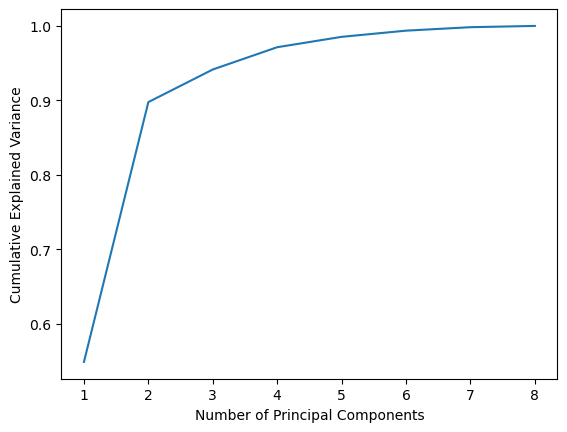

In [21]:
from sklearn.decomposition import PCA

# Create an instance of PCA
pca = PCA()

# Fit the PCA model to the normalized data
pca.fit(data_normalized)

# Get the explained variance ratio for each principal component
explained_variance_ratio = pca.explained_variance_ratio_

# Get the principal components
components = pca.components_

# Print the cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance_ratio)
print(cumulative_explained_variance)

# Plot the cumulative explained variance
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance)
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()


# Part II - KMeans Clustering

The objective of the analysis is to group similar products together into clusters based on their attributes such as fresh, milk, grocery, frozen, detergents_paper, and delicatessen. To perform the k-means clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters, initialize the centroids, assign data points to clusters, update the centroids, and repeat until convergence.

In [29]:
import os
from sklearn.cluster import KMeans
from sklearn import metrics


kmeans = KMeans(n_clusters=4, n_init=10, random_state=42)

# Variable to avoid the memory leak warning on Windows
os.environ['OMP_NUM_THREADS'] = '2'

kmeans.fit(data_normalized)

cluster_labels = kmeans.labels_

data['Cluster'] = cluster_labels

# Evaluate the clustering results
silhouette_score = metrics.silhouette_score(data_normalized, cluster_labels)
cohesion = kmeans.inertia_
print("Silhouette Score:", silhouette_score)
print("Cohesion:", cohesion)


c:\Users\rlmre\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Silhouette Score: 0.679962733411163
Cohesion: 26.542897831987606


# Part III - Hierarchical Clustering 

Hierarchical clustering is a popular unsupervised machine learning algorithm that is used to identify patterns and group similar data points together in a hierarchy. The algorithm works by iteratively merging or splitting clusters based on a similarity measure until a dendrogram is formed.

To perform hierarchical clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters using techniques such as dendrogram.

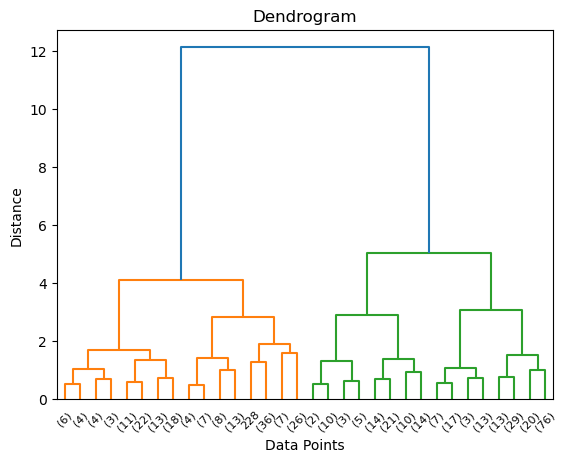

In [36]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import normalize

# Normalize the data if necessary
normalized_data = normalize(data)

# Perform hierarchical clustering
linkage_matrix = linkage(normalized_data, method='ward', metric='euclidean')

# Plot the dendrogram
dendrogram(linkage_matrix, truncate_mode='level', p=4)  # Adjust the value of 'p' as needed
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()


# Part IV - PCA

In this section you are going to perform principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

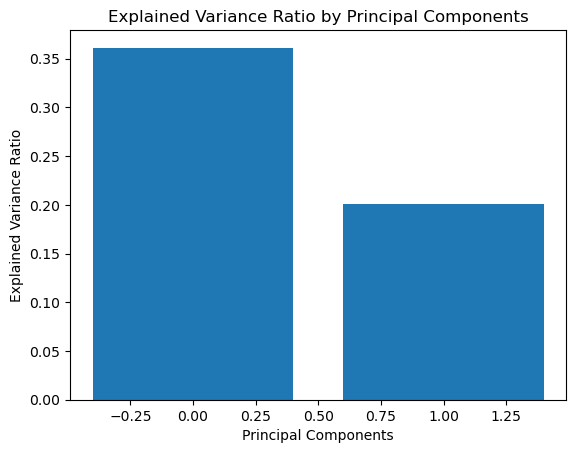

In [37]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the features if necessary
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Perform PCA
pca = PCA(n_components=2)  # Adjust the number of components as needed
principal_components = pca.fit_transform(scaled_data)
explained_variance_ratio = pca.explained_variance_ratio_

# Visualize the explained variance ratio
plt.bar(range(len(explained_variance_ratio)), explained_variance_ratio)
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Components')
plt.show()

# Analyze the loadings or coefficients of the original features
loadings = pca.components_


In [50]:
from sklearn.decomposition import PCA


pca = PCA(n_components=3)  
pca.fit(data_normalized)


pc1_weights = pca.components_[0]
pc2_weights = pca.components_[1]
pc3_weights = pca.components_[2]

print("Principal Component 1:")
print("Feature Weights:", pc1_weights)
print("\nPrincipal Component 2:")
print("Feature Weights:", pc2_weights)
print("\nPrincipal Component 3:")
print("Feature Weights:", pc3_weights)


Principal Component 1:
Feature Weights: [ 0.96130905  0.13017509 -0.03837946  0.10394495  0.13760278 -0.03336622
  0.16290858  0.00864833]

Principal Component 2:
Feature Weights: [ 0.12186143 -0.99110601 -0.02602089  0.01319149  0.02709027 -0.00284998
  0.03514695 -0.00550092]

Principal Component 3:
Feature Weights: [-0.17777879  0.00123106  0.42599828  0.51627547  0.47180566  0.22921772
  0.45737204  0.18986245]


# Part V - Conclusion

From the model you developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.

- Customers with higher values in the first principal component (PC1) show a strong preference for Detergents Paper, Grocery, and Milk, suggesting a focus on household and daily essential products.
- The second principal component (PC2) reveals that customers with higher values tend to spend more on Delicatessen and Frozen products while having relatively lower spending on Fresh items, indicating a preference for convenience or ready-to-eat options.
- The third principal component (PC3) highlights a preference for Delicatessen products and a lower spending on Fresh and Frozen items among certain customer segments, suggesting a focus on specialty products.